In [1]:
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

In [6]:
df=pd.read_csv(r"C:\Users\91996\Desktop\ML\Diabetes\diabetes.csv")

In [7]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# We can see there are no NAN values in any of the columns.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


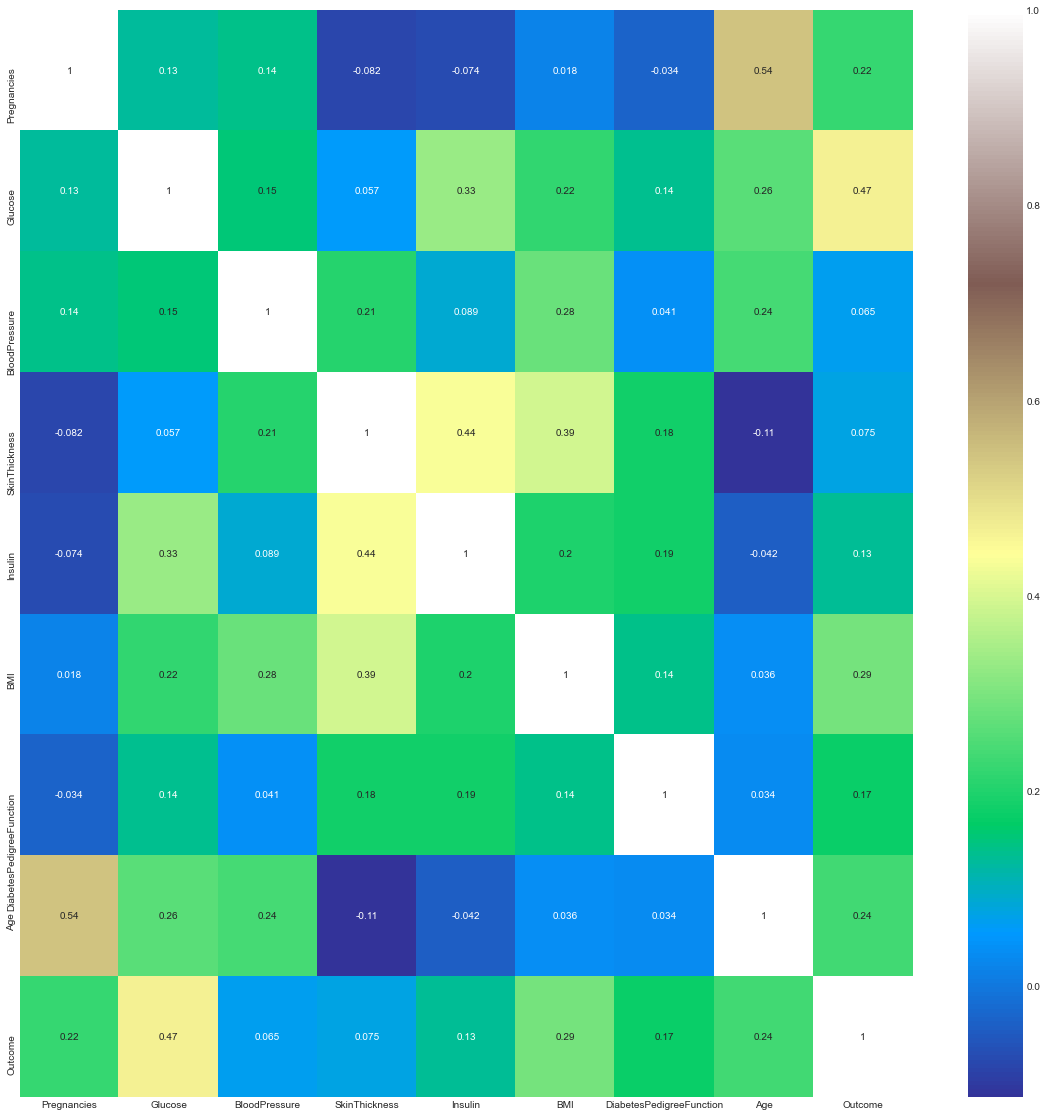

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='terrain')

# We can see that outcome is negatively correlated to blood pressure ,skin thickness and positively correlated to glucose.

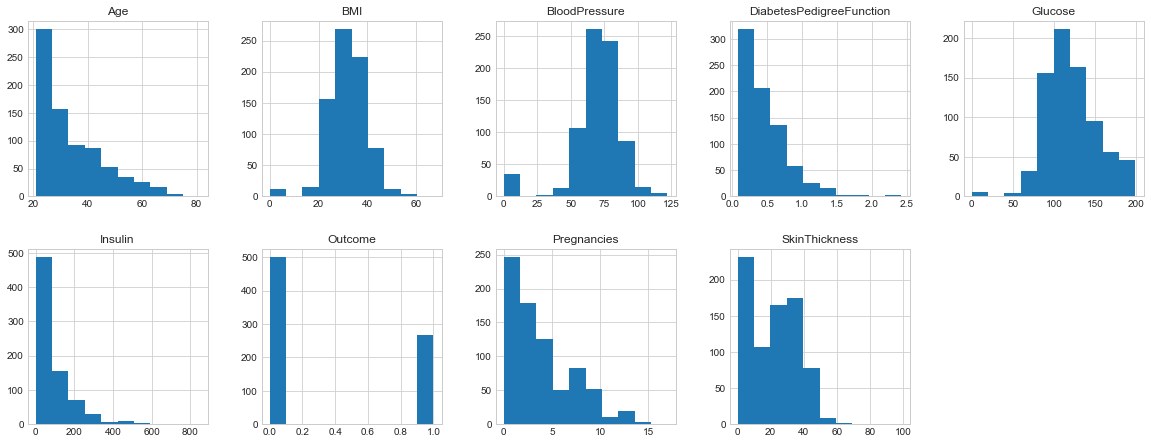

In [24]:
df.hist(figsize=(20,20),layout=(5,5));

In [28]:
df.Pregnancies.value_counts()#can use dummies


1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [31]:
df.SkinThickness.value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

# Visualizing the effect of different paramteres given.


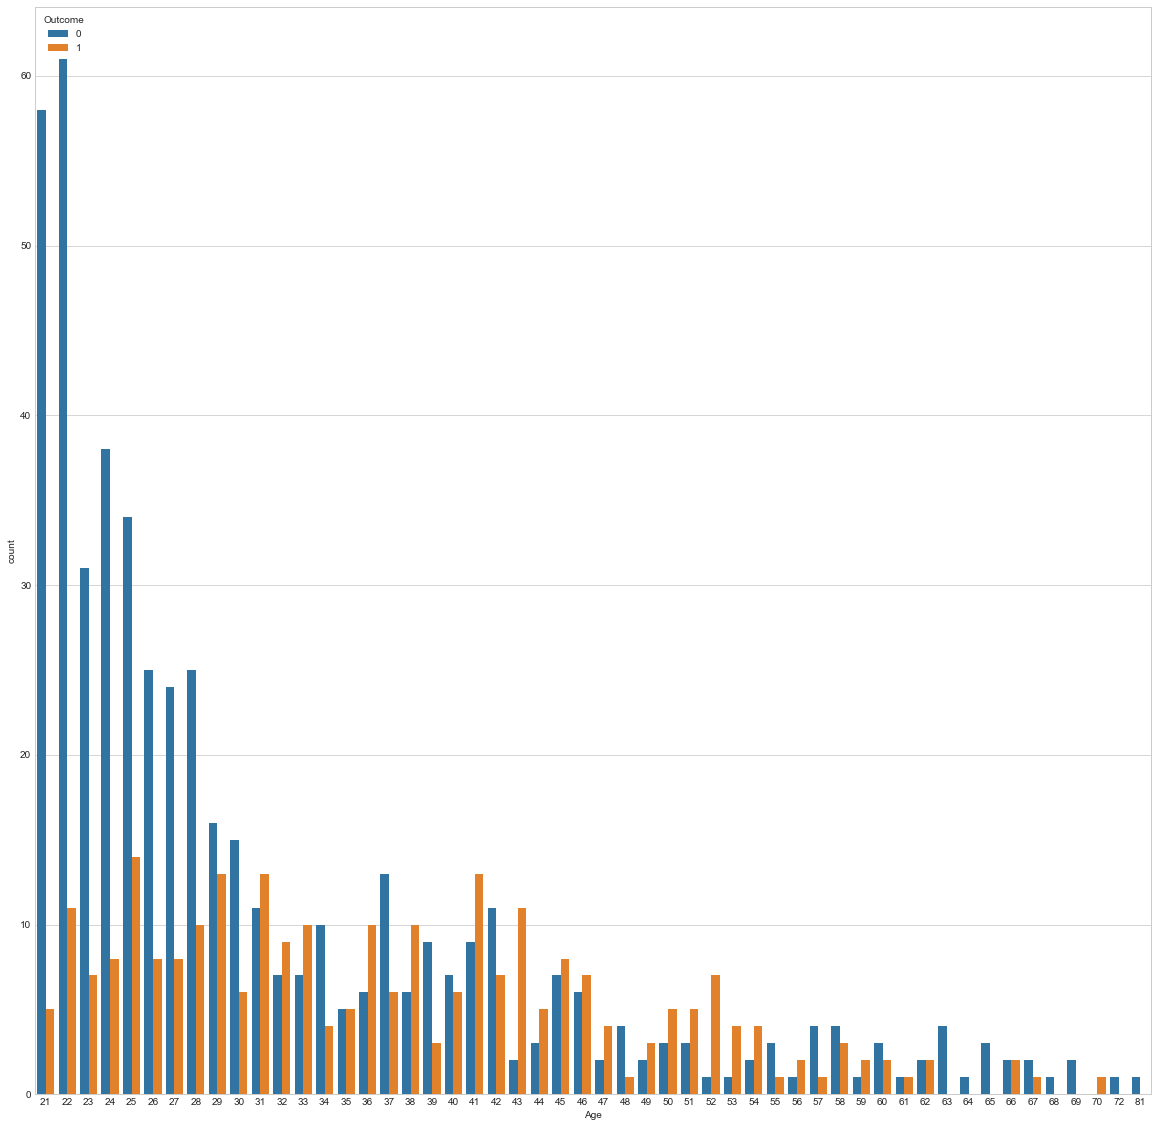

In [35]:
plt.figure(figsize=(20,20))
sns.countplot(x='Age',hue='Outcome',data=df)

It is definitely visible that from age 29 to 54 are crucial years for developing of diabetes.

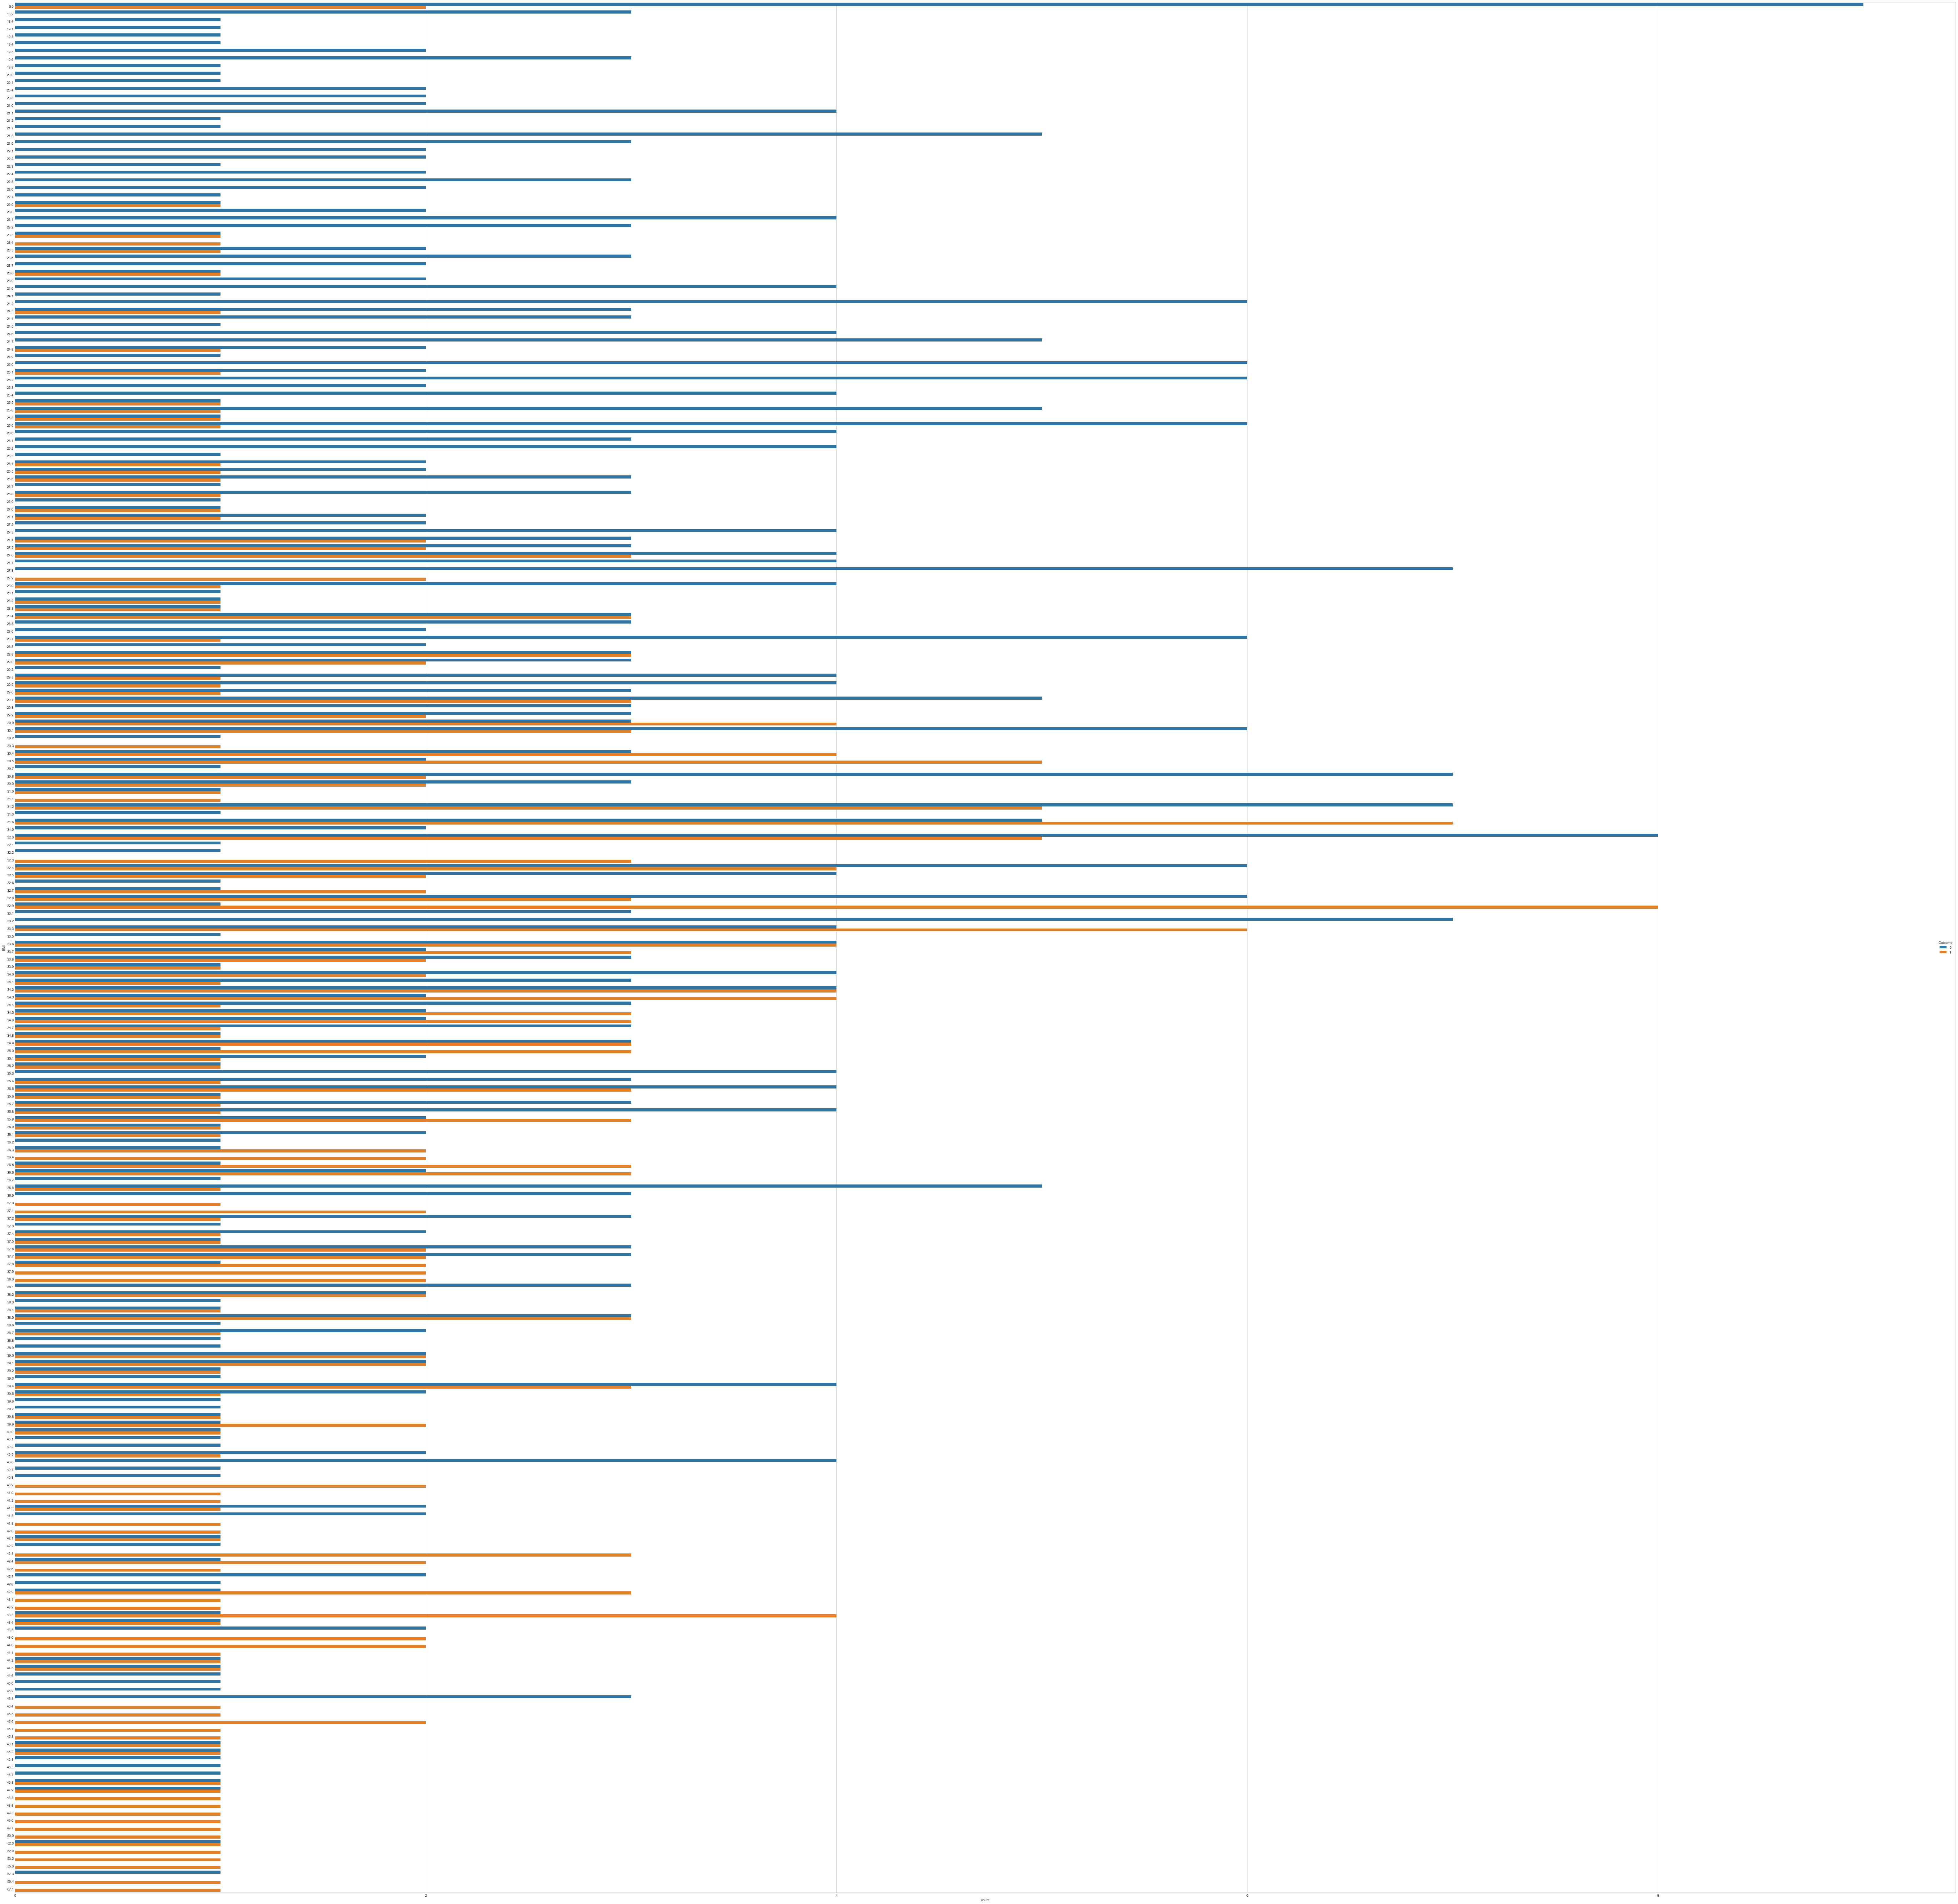

In [45]:
plt.figure(figsize=(100,100))
sns.countplot(y='BMI',hue='Outcome',data=df)

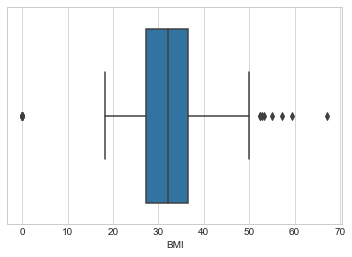

In [47]:
sns.boxplot(df.BMI)

Presence of outliers in our data

In [53]:
dataset=pd.get_dummies(df,columns=['Pregnancies'])

In [54]:
dataset.head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_0,Pregnancies_1,...,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17
0,148,72,35,0,33.6,0.627,50,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85,66,29,0,26.6,0.351,31,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,183,64,0,0,23.3,0.672,32,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,89,66,23,94,28.1,0.167,21,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,137,40,35,168,43.1,2.288,33,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn .preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
std=StandardScaler()
columns_to_scale=['Age','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
dataset[columns_to_scale]=std.fit_transform(dataset[columns_to_scale])
dataset.head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_0,Pregnancies_1,...,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
x=dataset.drop(['Outcome'],axis=1)
y=dataset['Outcome']
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_0,Pregnancies_1,Pregnancies_2,...,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=4)
print("x_train ",x_train.size)
print("y_train",y_train.size)
print("x_test",x_test.size)
print("y_test",y_test.size)

x_train  14736
y_train 614
x_test 3696
y_test 154


In [65]:
l=LogisticRegression()
model1=l.fit(x_train,y_train)
train_pred1 = model_selection.cross_val_predict(l, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=10, 
                                                  n_jobs = -1)
acc_cv = round(metrics.accuracy_score(y_train, train_pred1) * 100, 2)
print(acc_cv)
prediction1=model1.predict(x_test)
prediction1

75.9


array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [66]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,prediction1)
cm1

array([[88, 14],
       [17, 35]], dtype=int64)

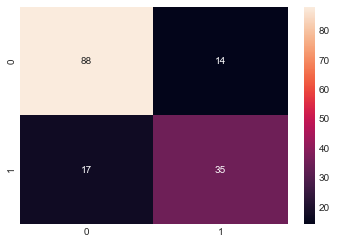

In [68]:
sns.heatmap(cm1,annot=True)

In [71]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_test,prediction1)*100
ac1

79.87012987012987

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       102
           1       0.71      0.67      0.69        52

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



In [74]:
k=KNeighborsClassifier()
model2=k.fit(x_train,y_train)
train_pred2 = model_selection.cross_val_predict(k, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=10, 
                                                  n_jobs = -1)
acc_cv_k = round(metrics.accuracy_score(y_train, train_pred2) * 100, 2)
print(acc_cv_k)
prediction2=model2.predict(x_test)
prediction2

70.68


array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [75]:
cm2=confusion_matrix(y_test,prediction2)
cm2

array([[86, 16],
       [24, 28]], dtype=int64)

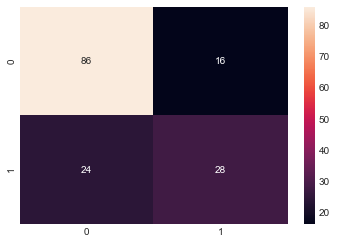

In [76]:
sns.heatmap(cm2,annot=True)

In [77]:
ac2=accuracy_score(y_test,prediction2)
ac2

0.7402597402597403

65.31


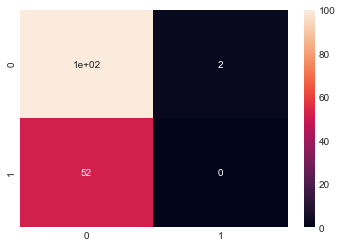

In [79]:
g=GaussianNB()
model3=g.fit(x_train,y_train)
train_pred3 = model_selection.cross_val_predict(g, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=10, 
                                                  n_jobs = -1)
acc_cv3 = round(metrics.accuracy_score(y_train, train_pred3) * 100, 2)
print(acc_cv3)
prediction3=model3.predict(x_test)
prediction3




cm3=confusion_matrix(y_test,prediction3)
cm3

sns.heatmap(cm3,annot=True)


In [80]:
ac3=accuracy_score(y_test,prediction3)
ac3

0.6493506493506493

In [81]:
s=SGDClassifier()
model4=s.fit(x_train,y_train)
train_pred4 = model_selection.cross_val_predict(s, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=10, 
                                                  n_jobs = -1)
acc_cv4 = round(metrics.accuracy_score(y_train, train_pred4) * 100, 2)
print(acc_cv4)
prediction4=model4.predict(x_test)
prediction4

72.64


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [82]:
ac4=accuracy_score(y_test,prediction4)
ac4

0.7077922077922078

In [83]:
cm4=confusion_matrix(y_test,prediction4)
cm4

array([[90, 12],
       [33, 19]], dtype=int64)

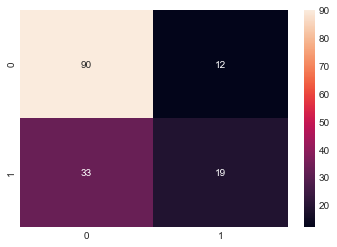

In [84]:
sns.heatmap(cm4,annot=True)

In [85]:
gb=GradientBoostingClassifier()
model5=gb.fit(x_train,y_train)
train_pred5 = model_selection.cross_val_predict(gb, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=10, 
                                                  n_jobs = -1)
acc_cv5 = round(metrics.accuracy_score(y_train, train_pred5) * 100, 2)
print(acc_cv5)
prediction5=model5.predict(x_test)
prediction5

74.1


array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [86]:
ac5=accuracy_score(y_test,prediction5)
ac5

0.7922077922077922

In [87]:
cm5=confusion_matrix(y_test,prediction5)
cm5

array([[85, 17],
       [15, 37]], dtype=int64)

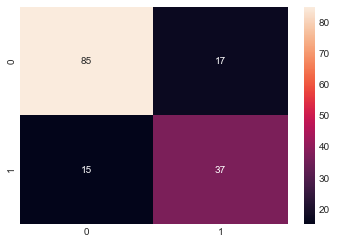

In [88]:
sns.heatmap(cm5,annot=True)

In [89]:
print(classification_report(y_test,prediction1))
print(classification_report(y_test,prediction2))
print(classification_report(y_test,prediction3))
print(classification_report(y_test,prediction4))
print(classification_report(y_test,prediction5))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       102
           1       0.71      0.67      0.69        52

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       102
           1       0.64      0.54      0.58        52

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154

              precision    recall  f1-score   support

           0       0.66      0.98      0.79       102
           1       0.00      0.00      0.00        52

    accuracy                           0.65       154
   macro avg       0.33      0.49      0.39       154
weighted avg       0.44      0.65      0.52       154

              preci

# Logistic Regression performs good in this case with an accuracy of 79%.We can improve the model using hyper parameter tuning.